##### Спецкурс "Распознавание образов"
---
### Нейронные сети

#### $\S$ 1.1. Многослойный персептрон. Двумерный случай и 4 класса.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature          # Здесь Hog
import pickle
from PIL import Image
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.neural_network import MLPClassifier # Многослойный персептрон
from skimage import feature # Здесь реализован LBP
%matplotlib inline

In [2]:
''' Обучающая выборка. '''
m_1 = [0, 0]
m_2 = [5, 5]
m_3 = [0, 5]
m_4 = [5, 0]
sigma_1 = [1, 1]
sigma_2 = [1, 1]
sigma_3 = [1, 1]
sigma_4 = [1, 1]
N = 300
X_1 = np.concatenate([np.random.normal(m_1[0], sigma_1[0], N).reshape((-1, 1)),
                      np.random.normal(m_1[1], sigma_1[1], N).reshape((-1, 1))], axis = 1)
X_2 = np.concatenate([np.random.normal(m_2[0], sigma_2[0], N).reshape((-1, 1)),
                      np.random.normal(m_2[1], sigma_2[1], N).reshape((-1, 1))], axis = 1)
X_3 = np.concatenate([np.random.normal(m_3[0], sigma_3[0], N).reshape((-1, 1)),
                      np.random.normal(m_3[1], sigma_3[1], N).reshape((-1, 1))], axis = 1)
X_4 = np.concatenate([np.random.normal(m_4[0], sigma_4[0], N).reshape((-1, 1)),
                      np.random.normal(m_4[1], sigma_4[1], N).reshape((-1, 1))], axis = 1)
X = np.concatenate([X_1, X_2, X_3, X_4], axis = 0)
Y = np.zeros(X.shape[0])
Y[:N] = 0
Y[N:(2*N)] = 1
Y[(2*N):(3*N)] = 2
Y[(3*N):] = 3
print(X.shape)
print(Y.shape)

(1200, 2)
(1200,)


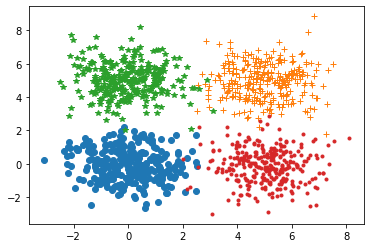

In [3]:
plt.figure()
plt.plot(X_1[:, 0], X_1[:, 1], 'o')
plt.plot(X_2[:, 0], X_2[:, 1], '+')
plt.plot(X_3[:, 0], X_3[:, 1], '*')
plt.plot(X_4[:, 0], X_4[:, 1], '.')

In [4]:
from tensorflow.keras import utils
num_classes = 4
# Нумерация классов должная начинаться с нуля: 0,1,2,3
# при применении функции utils.to_categorical
y = utils.to_categorical(Y, num_classes) # Прямое кодирование
y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [5]:
X_scale = sklearn.preprocessing.scale(X)

In [6]:
mlp = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = [7, 7], alpha = 1).fit(X_scale, y) # lbfgs - метод оптимизации (Ньютоновские)
print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_scale, y)))

Правильность на обучающем наборе: 0.98


/home/sergey/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


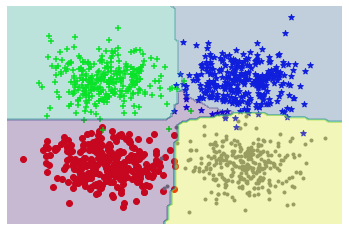

In [7]:
# Строим области предпочтения классов
N = 100
plt.figure()
ax = plt.gca()
ax.scatter(X_1[:, 0], X_1[:, 1], marker = 'o', c = [[1, 0, 0]])
ax.scatter(X_2[:, 0], X_2[:, 1], marker = '*', c = [[0, 0, 1]])
ax.scatter(X_3[:, 0], X_3[:, 1], marker = '+', c = [[0, 1, 0]])
ax.scatter(X_4[:, 0], X_4[:, 1], marker = '.', c = [[0.5, 0.5, 0.5]])
ax.axis('off')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num = N), np.linspace(*ylim, num = N))
A = sklearn.preprocessing.scale(np.concatenate([xx.reshape((-1, 1)),
                                                yy.reshape((-1, 1))], axis = 1))
d = mlp.predict(A)
zz = np.zeros(d.shape[0])
zz[np.nonzero(d[:, 1] == 1)[0]] = 1
zz[np.nonzero(d[:, 2] == 1)[0]] = 2
zz[np.nonzero(d[:, 3] == 1)[0]] = 3
zz = zz.reshape(xx.shape)
ax.contourf(xx, yy, zz, alpha = 0.3)

#### $\S$ 1.2. Применение многослойного персептрона к распознаванию жестов (3 класса)

In [8]:
def load_obj(name):
    ''' Чтение из файла.'''
    obj = pickle.load(open(name, 'rb' ))
    return obj

In [9]:
Data = load_obj('Hands/Hand.pkl') # Словарь вида: {'X' : X, 'Y' : Y}
X = Data['X']
Y = Data['Y']
Data_LBP = load_obj('Hands/Hand_LBP.pkl') # Словарь вида: {'LBP' : X, 'Y' : Y}
LBP_X = Data_LBP['LBP']
LBP_X.shape

(993, 27)

[1. 0. 0.] [0. 1. 0.] [0. 0. 1.]


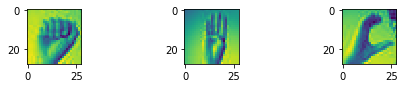

In [10]:
fig = plt.figure(figsize = (8, 1))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(Image.fromarray(np.uint8(X[0, :, :, 0])))
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(Image.fromarray(np.uint8(X[332, :, :, 0])))
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(Image.fromarray(np.uint8(X[665, :, :, 0])))
print(Y[0, :], Y[332, :], Y[665, :])

[1. 0. 0.] [0. 1. 0.] [0. 0. 1.]


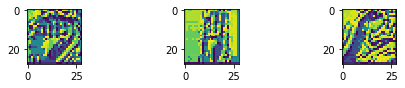

In [11]:
fig = plt.figure(figsize = (8, 1))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(Image.fromarray(np.uint8(feature.local_binary_pattern(X[0, :, :, 0], 8, 1, method='default'))))
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(Image.fromarray(np.uint8(feature.local_binary_pattern(X[332, :, :, 0], 8, 1, method='default'))))
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(Image.fromarray(np.uint8(feature.local_binary_pattern(X[665, :, :, 0], 8, 1, method='default'))))
print(Y[0, :], Y[332, :], Y[665, :])

In [12]:
from sklearn.decomposition import PCA
# оставляем первые пять главных компонент
pca = PCA(5)
pca.fit(LBP_X)
# преобразуем данные к первым пяти главным компонентам
LBP_X_pca = pca.transform(LBP_X)
LBP_X_pca.shape

(993, 5)

In [13]:
''' Разбиваем выборку на обучающую и тестовую '''
X_train, X_test, Y_train, Y_test = train_test_split(LBP_X_pca, Y, test_size = 0.5, random_state = 42)
''' Нормализация: среднее равно нуля, дисперсия 1. '''
X_train_scale = sklearn.preprocessing.scale(X_train)
X_test_scale = sklearn.preprocessing.scale(X_test)

In [14]:
mlp = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = [20, 3], alpha = 1).fit(X_train_scale, Y_train)
print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train_scale, Y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(mlp.score(X_test_scale, Y_test)))

Правильность на обучающем наборе: 1.00
Правильность на тестовом наборе: 0.98


/home/sergey/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### $\S$ 2.1. Сверточные нейронные сети. Архитектура

Сверточная нейронная сеть базируется на свертке изображений и обнаружении особенностей на основе фильтров, которым обучается сверточная нейронная сеть. В случае обучения с учителем фильтры тренируются так, чтобы минимизировать полную функцию стоимости. Основные компоненты сверточной сети имеют вид:

1. Входной слой используется для хранения интенсивностей пикселей изображения.

2. Слой свертки принимает изображения от предыдущих слоев и выполняет свертку с определенным количеством фильтров для создания изображений, называемых выходными картами признаков. Количество выходных карт признаков равно количеству фильтров. В сверточных сетях задаются только размеры фильтров, веса инициализуруются перед началом тренировки произвольными значениями. Обучение весам фильтров осуществляется посредством тренировки сети, а значит, они могут не представлять собой традиционные фильтры для обработки изображений. Обученные фильтры будут минимизировать полную функцию стоимости.

3. Слой активации -- это, как правило, слой с функциями активации ReLU, который добавляет нелинейность.

4. Слой субдискретизации (пулинга) выполняет понижающую дискретизацию, т.е. снижение размерности 2D-карт по ширине и высоте. Операция субдискретизации уплотняет пиксели в пределах некоторой локальной окрестности рассматриваемого пикселя, причем размер этой окрестности, так называемой рецептивным полем, определяется размером ядра фильтра. Как правило уплотнение осуществляется по максимальному или среднему значению. В первом случае в качестве пикселя, представляющего данную окрестность, выбирается пиксель с максимальной интенсивностью, во втором -- среднее значение интенсивностей пикселей в этой окрестности. Обычно размер окна фильтра равен $2\times 2$, величина шага -- 2.

5. Полносвязные слои содержат традиционные нейроны, которые получают различные наборы весов от предыдущих слоев.

![Image](Hands/Fig_5.png)

#### $\S$ 2.2. Выход сверточной сети

Итак, рассмотрим $i+1$ сверточный слой. На вход подается множество карт-признаков $\mathrm{x}_{s, \bullet, \bullet, \bullet}^{(i)} = \{x_{s,k_1,k_2,k_3}^{(i)}\}_{k_1,k_2,k_3=0}^{H_i-1, W_i-1, G_i - 1}$ (размером $H_i\times W_i$, где $s=0,1,\dots, N$.

$i+1$-ый сверточный слой: имеется $N_{i+1}$ фильтров 

$$
\{k_{m_1, m_2, m_3, \alpha}^{(i+1)}\}_{m_1,m_2=-H_x,-H_y, m_3 = 0}^{H_x,H_y, G_i-1}, ~~\alpha=0, \dots, N_{i+1}-1.
$$

Выход сверточного слоя - это множество карт признаков $\{\{x_{s, k_1, k_2, \alpha}^{(i+1)}\}_{k_1, k_2=0}^{H_{i+1}-1,W_{i+1}-1},~~\alpha=0,1,\dots, N_{i+1}-1\}$, где $s=0,1,\dots, N$ и

$$
x_{i, k_1, k_2, \alpha}^{(i+1)} = \sum\limits_{m_1, m_2, m_3} x_{i, k_1 + m_1, k_2 + m_2, m_3}^{(i)} \cdot k_{m_1, m_2, m_3, \alpha}^{(i+1)} + b_{\alpha}, ~~ \alpha=0,1,\dots, N_{i+1}-1.
$$

Полносвязный слой (многослойный персептрон):

$$
\mathrm{y}_s^{(j+1)} = \varphi_{j+1}(\mathrm{b}^{(j)} + \mathrm{y}_s^{(j)}\mathrm{W}^{(j)}),
$$

при этом $y_s^{(0)} = (\mathrm{x}_{s, \bullet, \bullet, \bullet}^{(K)}).\mathrm{flatten()}$

In [68]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from sklearn.model_selection import train_test_split
import numpy as np
import pickle                                            # Для работы с файлами
from PIL import Image                                    # Для работы с изображениями
import matplotlib.pyplot as plt                          # Для графиков
%matplotlib inline

In [16]:
def load_obj(name):
    ''' Чтение из файла.'''
    obj = pickle.load(open(name, 'rb' ))
    return obj

In [42]:
Data = load_obj('Hands/Hand.pkl') # {'X' : X, 'Y' : Y}
Face = Data[('X')]
Who = Data[('Y')]
#Face = Data[('Face')]
#Who = Data[('Who')]

In [49]:
print(Face.shape, np.array(Face[0]).shape)
print(Who.shape)

(993, 28, 28, 1) (28, 28, 1)
(993, 3)


In [83]:
def Load_XY(Face, Who):
    '''
    Формируем массив X размера 600 x 115 x 110 x 1, содержащий изображения лиц глубины 1 (монохромные).
    Массив Y размера 600 x 2, содержащий метки классов вида (1, 0) или (0, 1).
    '''
#     Y = np.zeros((len(Who), 3))
    X = np.zeros((len(Who), 28, 28, 1))
    for i in range(len(Who)):
#         if (Who[i] == 0):
#             Y[i, 0] = 1
#         else:
#             Y[i, 1] = 1
        X[i, :, :, 0] = np.array(Face[i])[:, :, 0]
    X = Face.copy()
    Y = Who.copy()
    return [X, Y]

In [84]:
Face.shape

(993, 28, 28, 1)

In [85]:
X.shape

(993, 28, 28, 1)

In [86]:
X, Y = Load_XY(Face, Who)
print(X.shape)

(993, 28, 28, 1)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 42)

In [88]:
def dimension(r, N):
    # Оценка измерения после N слоев
    d = r
    for i in range(N):
        if (d % 2 == 0):
            d = np.int32(d / 2)
        else:
            d = np.int32((d + 1) / 2)
    return d

In [95]:
input_height = 28        # высота изображения
input_width = 28         # ширина изображения
depth_in = 1              # глубина изображения. Монохромные
depth_out1 = 12           # количество карт признаков в первом скрытом слое
depth_out2 = 24           # количество карт признаков во втором скрытом слое
# depth_out3 = 48           # количество карт признаков во втором скрытом слое
filter_height = 5         # ширина фильтра
filter_width = 5          # высота фильтра
n_classes = 3             # Количество выходных классов
'''
Входные изображения:
1-е измерение - это номер изображения в выборке
2-е измерение - это высота изображения
3-е измерение - это ширина изображения
4-е измерение - это глубина изображения
'''
# Exit = dimension(input_height, 3) * dimension(input_width, 3) * depth_out3
Exit = dimension(input_height, 2) * dimension(input_width, 2) * depth_out2
'''
Веса фильтров для первого слоя
'''
k1 = np.random.normal(size = (filter_height, filter_width, 1, depth_out1))
k2 = np.random.normal(size = (filter_height, filter_width, depth_out1, depth_out2))
# k3 = np.random.normal(size = (filter_height, filter_width, depth_out2, depth_out3))
''' Смещения для слоев'''
b1 = np.random.normal(size = (depth_out1))
b2 = np.random.normal(size = (depth_out2))
# b3 = np.random.normal(size = (depth_out3))
''' Полносвязная сеть '''
w = np.random.normal(size = (Exit, n_classes))
b = np.random.normal(size = (n_classes))

In [96]:
tf_x = tf.compat.v1.placeholder(tf.float64, [None, input_height, input_width, depth_in])
tf_y = tf.compat.v1.placeholder(tf.float64, [None, n_classes])
tf_k1 = tf.Variable(k1, dtype = tf.float64)
tf_k2 = tf.Variable(k2, dtype = tf.float64)
# tf_k3 = tf.Variable(k3, dtype = tf.float64)
tf_b1 = tf.Variable(b1, dtype = tf.float64)
tf_b2 = tf.Variable(b2, dtype = tf.float64)
# tf_b3 = tf.Variable(b3, dtype = tf.float64)
tf_w = tf.Variable(w, dtype = tf.float64)
tf_b = tf.Variable(b, dtype = tf.float64)

In [97]:
# def cnn(tf_x, tf_k1, tf_b1, tf_k2, tf_b2, tf_k3, tf_b3, tf_w, tf_b):
def cnn(tf_x, tf_k1, tf_b1, tf_k2, tf_b2, tf_w, tf_b):
    ''' Сверточная нейронная сеть '''
    sh = tf.shape(tf_x)
    ''' 
    Первый сверточный слой
    '''
    y = tf.nn.conv2d(tf_x, tf_k1, strides = [1, 1, 1, 1], padding = 'SAME')
    y = tf.nn.bias_add(y, tf_b1)
    y1 = tf.nn.relu(y)
    ''' 
    Слой субдискретизации.
    '''
    y = tf.nn.max_pool(y1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    '''
    Второй сверточный слой
    '''
    y = tf.nn.conv2d(y, tf_k2, strides = [1, 1, 1, 1], padding = 'SAME')
    y = tf.nn.bias_add(y, tf_b2)
    y2 = tf.nn.relu(y)
    ''' 
    Слой субдискретизации.
    '''
    y2 = tf.nn.max_pool(y2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
    
    '''
    Полносвязный слой
    '''
    y3 = tf.reshape(y2, shape = (sh[0], -1))     # None x n
    n_y3 = tf.norm(y3, axis = 1)                 # None
    # нормирование (None x n)^T -> n x None -> (: None)^T -> None x n
    y3 = tf.transpose(tf.transpose(y3, perm = [1, 0]) / n_y3, perm = [1, 0])
    z = tf.add(tf.matmul(y3, tf_w), tf_b)
    return z

In [98]:
#cnn_res = cnn(tf_x, tf_k1, tf_b1, tf_k2, tf_b2, tf_k3, tf_b3,tf_w, tf_b)
cnn_res = cnn(tf_x, tf_k1, tf_b1, tf_k2, tf_b2, tf_w, tf_b)
cost = tf.reduce_mean(tf.compat.v1.nn.softmax_cross_entropy_with_logits_v2(logits = cnn_res, labels = tf_y))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)
# Оценка модели
correct_pred = tf.equal(tf.argmax(cnn_res, 1), tf.argmax(tf_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [99]:
epochs = 25
batch_size = 300
num_batches = np.int32(X_train.shape[0] / batch_size)

In [100]:
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for  i in range(epochs):
        for j in range(num_batches):
            i1 = j * batch_size
            i2 = (j + 1) * batch_size
            banch_x = X_train[i1:i2, :, :, :]
            banch_y = y_train[i1:i2, :]
            sess.run(optimizer, feed_dict = {tf_x: banch_x, tf_y: banch_y})
            if (i % 5 == 0):
                loss, acc = sess.run([cost, accuracy], feed_dict = 
                                     {tf_x: banch_x, tf_y: banch_y})
                print('Эпоха ', i + 1, ' cost = ', loss, ' acc =', acc)
    k1, k2, b1, b2, w, b = sess.run([tf_k1, tf_k2, tf_b1, tf_b2, tf_w, tf_b])
    for j in range(num_batches):
        i1 = j * batch_size
        i2 = (j + 1) * batch_size
        banch_x = X_test[i1:i2, :, :, :]
        banch_y = y_test[i1:i2, :]
        acc = sess.run([accuracy], feed_dict = {tf_x: banch_x, tf_y: banch_y})
        print('Тестовая выборка acc =', acc)

Эпоха  1  cost =  1.953688926189681  acc = 0.30333334
Эпоха  6  cost =  1.185353126580424  acc = 0.38666666
Эпоха  11  cost =  1.152057974762156  acc = 0.43
Эпоха  16  cost =  0.9316237131316878  acc = 0.67
Эпоха  21  cost =  0.904663005710072  acc = 0.56333333
Тестовая выборка acc = [0.9533333]


### Литература


\[1.\] Бодянский Е.В. Искусственные нейронные сети: архитектуры, обучение, применения.-- Харьков: ТЕЛЕТЕХ, 2004. -- 369 с.: ил.

\[2.\] Паттанаяк С. Глубокое обучение и TensorFlow для профессионалов. Математический подход к построению систем искусственного интеллекта на Python.: Пер с англ. - СПб.: ООО "Диалектика", 2020. - 480 с.